In [1]:
from context import py
# from py.data_mining import scrape



KeyboardInterrupt: 

In [2]:
from py.data_mining import dump

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
train_data = pd.read_csv("tweets_superbowl.csv")

In [50]:
train_data.shape

(9277, 4)

In [59]:
train_data  =train_data[["text","polarity"]]

In [55]:
train_data.shape

(9277, 2)

In [121]:
train_data

,text,polarity,analysis
0,. goes to the big board and tells us why Aaron...,-0.100000,Negative
1,": 📞 Jordan Love w/ : ""I'm here to develop and ...",0.500000,Positive
2,: Who's your team for Sunday?\nTampa Bay Bucca...,0.800000,Positive
3,Haha armpit of the north? Not heard that phra...,0.267857,Positive
4,Podcasters be telling former players capable o...,0.100000,Positive
...,...,...,...
9272,": 🚨 De acordo com um vazamento no reddit, aman...",0.000000,Neutral
9273,: Outta-the-Vault special! 🤘🏽🎷 5 Best Songs in...,0.723214,Positive
9274,: The Kansas City Chiefs are departing from KC...,0.000000,Neutral
9275,Yay GoBucs. Im ready. Got the ciders on ice an...,0.200000,Positive


In [61]:
#clean tweets
import re
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

train_data["text"] = train_data["text"].apply(cleanTxt)

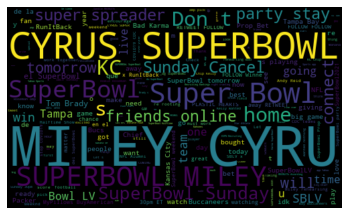

In [62]:
#world cloud visualisation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = ' '.join([twts for twts in train_data["text"]])
wordcloud = WordCloud(width =500,height = 300,random_state= 21,max_font_size = 110).generate(allwords)
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis('off')
plt.show()


In [63]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
train_data['analysis'] = train_data['polarity'].apply(getAnalysis)

In [13]:
def getScore(analysis):
    if analysis == 'Positive':
        return 4
    elif analysis == 'Negative':
        return 0
    else:
        return 2
train_data['score'] = train_data['analysis'].apply(getScore)

In [14]:
train_data.head()

,text,polarity,analysis,score
0,. goes to the big board and tells us why Aaron...,-0.100000,Negative,0
1,": 📞 Jordan Love w/ : ""I'm here to develop and ...",0.500000,Positive,4
2,: Who's your team for Sunday?\nTampa Bay Bucca...,0.800000,Positive,4
3,Haha armpit of the north? Not heard that phra...,0.267857,Positive,4
4,Podcasters be telling former players capable o...,0.100000,Positive,4


In [20]:
df_test = train_data[int(9277*.9):]

In [21]:
df_test.shape

(928, 4)

In [22]:
df_train = train_data[:int(9277*.9)]

In [23]:
df_train.shape

(8349, 4)

In [24]:
df_train.head()

,text,polarity,analysis,score
0,. goes to the big board and tells us why Aaron...,-0.100000,Negative,0
1,": 📞 Jordan Love w/ : ""I'm here to develop and ...",0.500000,Positive,4
2,: Who's your team for Sunday?\nTampa Bay Bucca...,0.800000,Positive,4
3,Haha armpit of the north? Not heard that phra...,0.267857,Positive,4
4,Podcasters be telling former players capable o...,0.100000,Positive,4


In [25]:
tweets_train = df_train['text']

In [26]:
labels_train = df_train['score']

In [27]:
tweets_test = df_test['text'].tolist()
labels_test = df_test['score'].tolist()

In [28]:

training_labels_final = np.array(labels_train)
testing_labels_final = np.array(labels_test)

In [29]:
print(len(training_labels_final))
labels_train[0]

8349


0

In [ ]:
##Tokenize and pad

In [45]:
# from nltk import TweetTokenizer
# tweet_tokenizer = TweetTokenizer(reduce_len = 3)
# train_data.text = train_data.text.apply(lambda x:tweet_tokenizer.tokenize(x))


In [31]:
train_data.head()


,text,polarity,analysis,score
0,"[., goes, to, the, big, board, and, tells, us,...",-0.100000,Negative,0
1,"[:, 📞, Jordan, Love, w, /, :, "", I'm, here, to...",0.500000,Positive,4
2,"[:, Who's, your, team, for, Sunday, ?, Tampa, ...",0.800000,Positive,4
3,"[Haha, armpit, of, the, north, ?, Not, heard, ...",0.267857,Positive,4
4,"[Podcasters, be, telling, former, players, cap...",0.100000,Positive,4


In [34]:
vocab_size = 1000
embedding_dim = 16
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size,oov_token = oov_tok)
tokenizer.fit_on_texts(tweets_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(tweets_train)
training_padded = pad_sequences(training_sequences,
                                padding = padding_type,truncating = trunc_type,maxlen=max_length)
testing_sequences = tokenizer.texts_to_sequences(tweets_test)
testing_padded = pad_sequences(testing_sequences,
                              padding = padding_type,truncating=trunc_type,maxlen=max_length)



F:\softwares\Python\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\softwares\Python\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\softwares\Python\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\softwares\Python\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [30]:
batch_size = 30
train_set = tf.data.Dataset.from_tensor_slices((training_padded,training_labels_final)).batch(batch_size)
test_set = tf.data.Dataset.from_tensor_slices((testing_padded,testing_labels_final)).batch(batch_size)

In [191]:
# BUFFER_SIZE = 10000
# # BATCH_SIZE = 64

# # train_dataset = df_train['text'].shuffle(BUFFER_SIZE)
# train_dataset = df_train['text'].padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
# test_dataset = df_test['text'].padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

# Build the model

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(tf.keras.layers.Dense(6,activation = 'relu'))
model.add(tf.keras.layers.Dense(5,activation= 'sigmoid'))
model.add(tf.keras.layers.Dense(5,activation ='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 32)            4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 26,759
Trainable params: 26,759
Non-trainable params: 0
__________________________________________________

In [38]:
from tensorflow.keras.utils import to_categorical
training_labels_binary = to_categorical(training_labels_final)
testing_labels_binary = to_categorical(testing_labels_final)

In [39]:
training_labels_binary.shape

(8349, 5)

In [40]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(0.01),
             metrics=['accuracy'])


In [41]:
training_labels_final.shape

(8349,)

In [42]:
# callbacks = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
#     baseline=None, restore_best_weights=False
# )
num_epochs=10
modelo = model.fit(training_padded,training_labels_binary ,epochs=num_epochs,
                   validation_data=(testing_padded,testing_labels_binary) 
#           callbacks=[callbacks])
                  )

Train on 8349 samples, validate on 928 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
8349/8349 [==============================] - 15s 2ms/sample - loss: 0.9808 - acc: 0.5522 - val_loss: 0.9451 - val_acc: 0.5647
Epoch 2/10
8349/8349 [==============================] - 12s 1ms/sample - loss: 0.9391 - acc: 0.5587 - val_loss: 0.9436 - val_acc: 0.5647
Epoch 3/10
8349/8349 [==============================] - 14s 2ms/sample - loss: 0.9379 - acc: 0.5587 - val_loss: 0.9423 - val_acc: 0.5647
Epoch 4/10
8349/8349 [==============================] - 14s 2ms/sample - loss: 0.9382 - acc: 0.5587 - val_loss: 0.9440 - val_acc: 0.5647
Epoch 5/10
8349/8349 [==============================] - 14s 2ms/sample - loss: 0.9369 - acc: 0.5587 - val_loss: 0.9412 - val_acc: 0.5647
Epoch 6/10
8349/8349 [==============================] - 14s 2ms/sample - loss: 0.9365 - acc: 0.5587 - val_loss: 0.9411 - val_acc: 0.5647
Epoch 7/10
8349/8349 [===============

Text(0, 0.5, 'Accuracy')

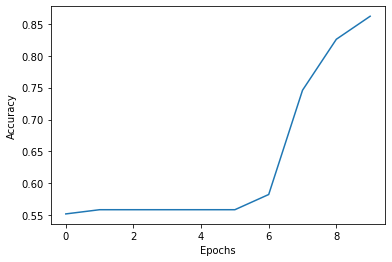

In [66]:
plt.plot(modelo.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

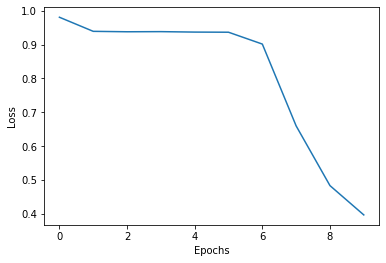

In [67]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [120]:
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was bad',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)
# print(classes)
k = 0
while k<len(fake_reviews):
    for i in classes:
        max_ = max(i)
        for j in range(len(i)):
            if max_ == i[j]:
                index = j
                if index ==0:
                    print(fake_reviews[k],"::","Negative")
                    k=k+1
                elif index == 4:
                    print(fake_reviews[k],"::","Positive")
                    k=k+1
                else:
                    print(fake_reviews[k],"::","Neutral")
                    k=k+1
        
        

['I love this phone', 'I hate spaghetti', 'Everything was bad', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']
I love this phone :: Positive
I hate spaghetti :: Negative
Everything was bad :: Neutral
Everything was hot exactly as I wanted :: Neutral
Everything was green :: Negative
the host seated us immediately :: Neutral
they gave us free chocolate cake :: Negative
not sure about the wilted flowers on the table :: Positive
only works when I stand on tippy toes :: Neutral
does not work when I stand on my head :: Neutral


In [65]:
history_dict = modelo.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
